In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.io
plt.rcParams["figure.figsize"] = [10 , 10]
plt.rcParams.update({"font.size" : 18})

In [5]:
allfaces = "/content/allFaces.mat"

mat_contents = scipy.io.loadmat(allfaces , verify_compressed_data_integrity=False)



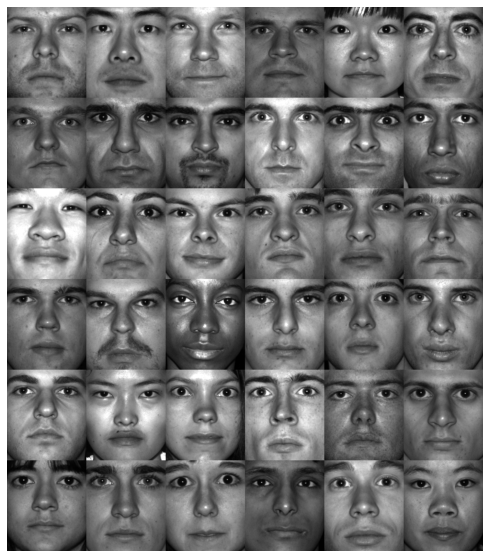

In [6]:
faces = mat_contents['faces']
m = int(mat_contents['m'])
n = int(mat_contents['n'])
nfaces = np.ndarray.flatten(mat_contents['nfaces'])

allPersons = np.zeros((n*6,m*6))
count = 0

for j in range(6):
    for k in range(6):
        allPersons[j*n : (j+1)*n, k*m : (k+1)*m] = np.reshape(faces[:,np.sum(nfaces[:count])],(m,n)).T
        count += 1
        
img = plt.imshow(allPersons)
img.set_cmap('gray')
plt.axis('off')
plt.show()

In [7]:
for person in range(len(nfaces)):
    subset = faces[:,sum(nfaces[:person]) : sum(nfaces[:(person+1)])]
    allFaces = np.zeros((n*8,m*8))
    
    count = 0
    
    for j in range(8):
        for k in range(8):
            if count < nfaces[person]:
                allFaces[j*n:(j+1)*n,k*m:(k+1)*m] = np.reshape(subset[:,count],(m,n)).T
                count += 1
                
    img = plt.imshow(allFaces)
    img.set_cmap('gray')
    plt.axis('off')
    plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [8]:
#we will use first 36 people for training data:

trainingfaces = faces[:,:np.sum(nfaces[:36])]
avgface = np.mean(trainingfaces , axis = 1)

In [9]:
x = trainingfaces - np.tile(avgface , (trainingfaces.shape[1] , 1)).T
U, S , VT = np.linalg.svd(x , full_matrices= 0)


(-0.5, 167.5, 191.5, -0.5)

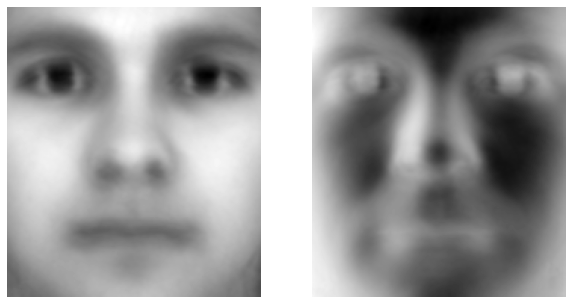

In [10]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(121)
img_avg = ax1.imshow(np.reshape(avgface, (m,n)).T)
img_avg.set_cmap("gray")
plt.axis("off")

ax2 = fig1.add_subplot(122)
img_u1 = ax2.imshow(np.reshape(U[:,0],(m,n)).T)
img_u1.set_cmap("gray")
plt.axis("off")


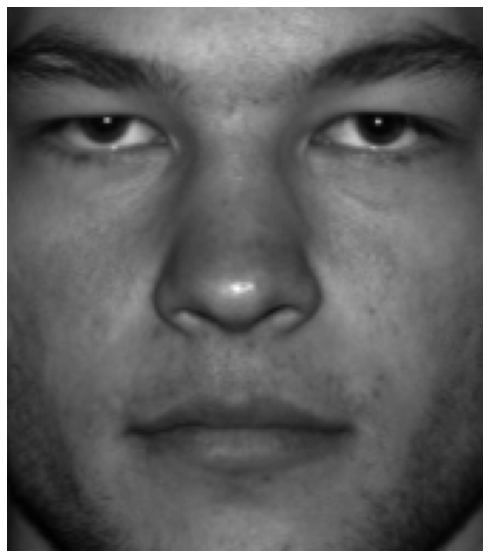

In [11]:
#eignface reconstruction of test image

testface = faces[:, np.sum(nfaces[:36])]  #first face of the person 37
plt.imshow(np.reshape(testface, (m,n)).T)
plt.set_cmap("gray")
plt.axis("off")
plt.show()

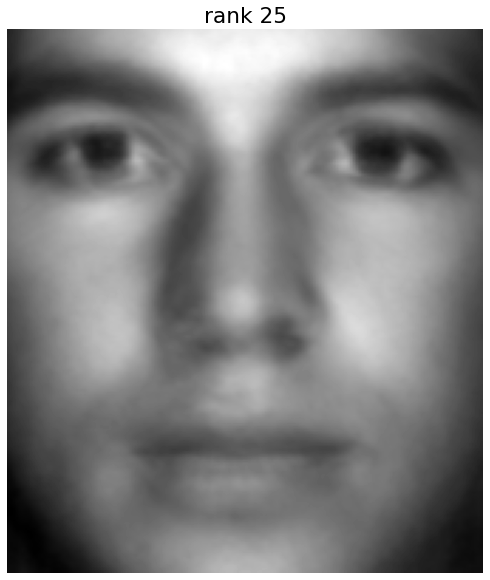

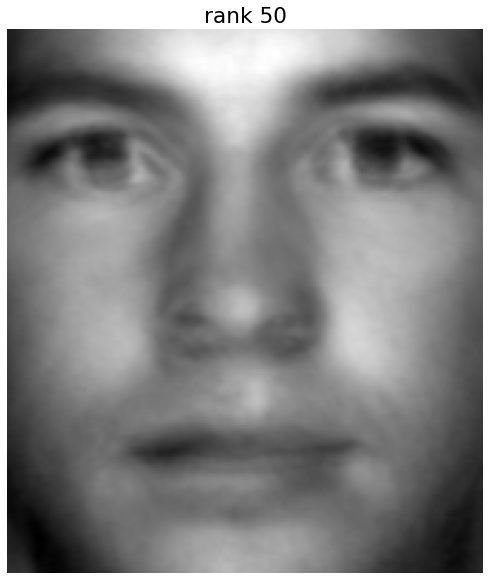

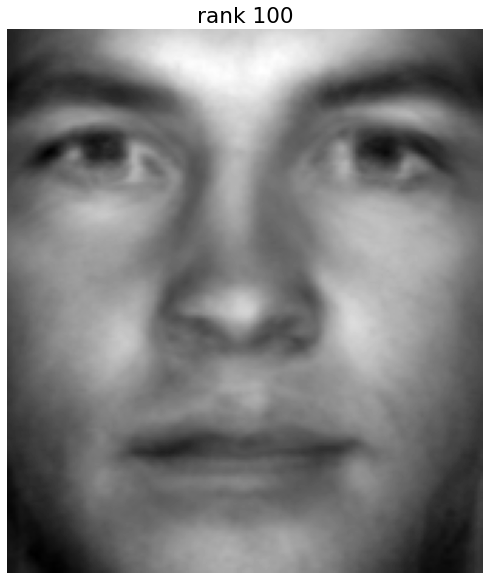

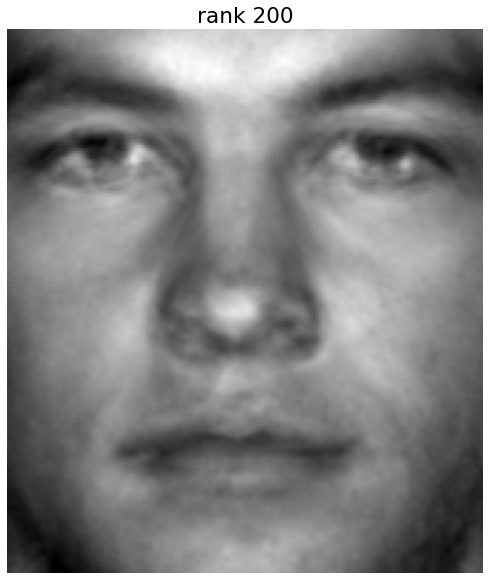

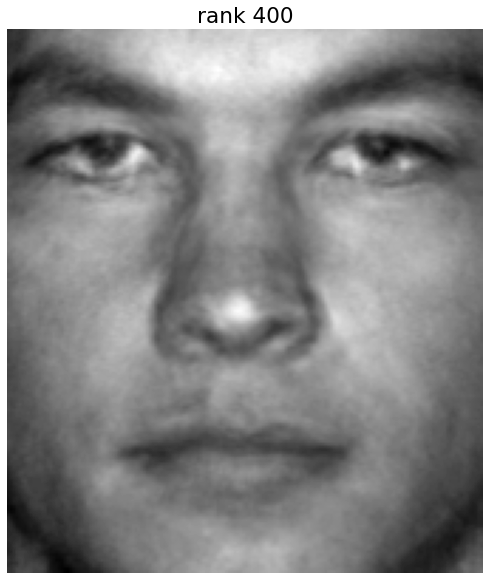

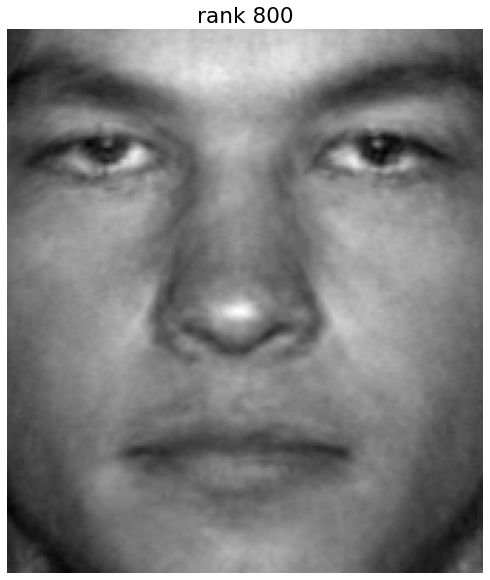

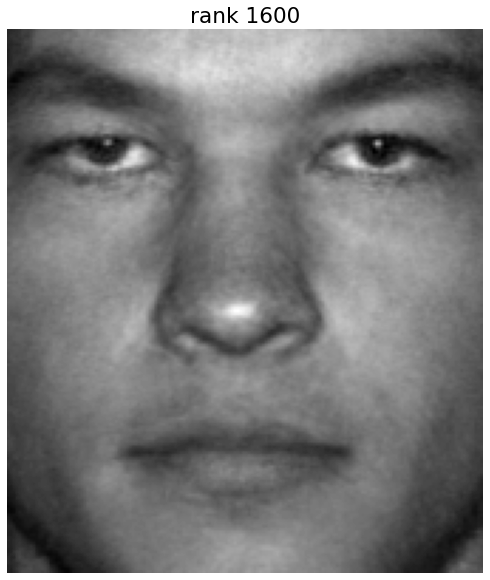

In [12]:
testfaceMS = testface - avgface
r_list = [25,50,100,200,400,800, 1600]

for r in r_list:
  recon_face = avgface + U[: , : r] @ (U[: , : r].T @testfaceMS )
  img = plt.imshow(np.reshape(recon_face,(m , n)).T)
  img.set_cmap("gray")
  plt.title(f"rank {r}")
  plt.axis("off")
  plt.show()

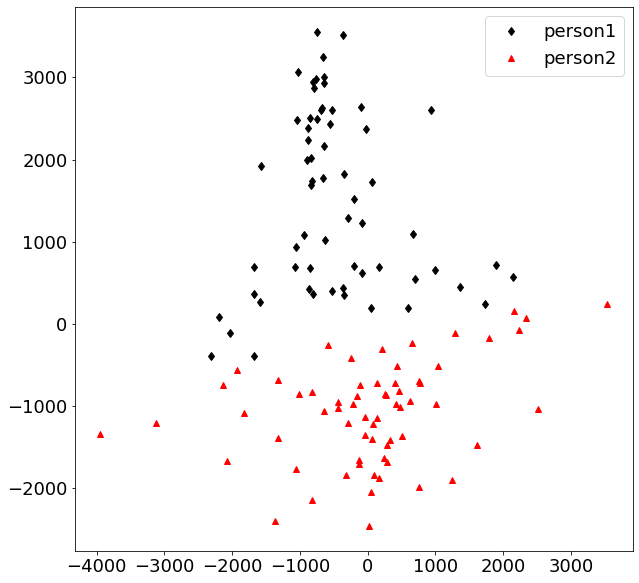

In [17]:
#face recognition

P1num = 2 #person 2
P2num = 7 #person 7
P1 = faces[:,np.sum(nfaces[:(P1num - 1)]) : np.sum(nfaces[:P1num])]
P2 = faces[:,np.sum(nfaces[:(P2num - 1)]) : np.sum(nfaces[:P2num])]

P1 = P1 - np.tile(avgface , (P1.shape[1],1)).T
P2 = P2 - np.tile(avgface , (P2.shape[1],1)).T

PCAmodes = [5,6]  #project on PCA modes 5 and 6
PCACoordP1 = U[:,PCAmodes -np.ones_like(PCAmodes)].T @ P1
PCACoordP2 = U[:,PCAmodes -np.ones_like(PCAmodes)].T @ P2

plt.plot(PCACoordP1[0,:] , PCACoordP1[1,:] , "d" , color = "k" , label = "person1")
plt.plot(PCACoordP2[0,:] , PCACoordP2[1,:] , "^" , color = "r" , label = "person2")

plt.legend()
plt.show()



In [19]:
P1.shape

(32256, 62)